<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/Yolo8_v1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mega.py

from mega import Mega

# Crie uma instância da classe Mega
mega = Mega()

# Cole o link completo do Mega.nz (incluindo a chave)
url = "https://mega.nz/file/IutEjTyL#1SKwDXDjvmyvHjl7GxRM9kx2blr12R_5utVac9FU-LU"

# Use o link completo para fazer o download
mega.download_url(url)

!unzip w251final.v2i.yolov8.zip

In [ ]:
!pip install ultralytics

In [5]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

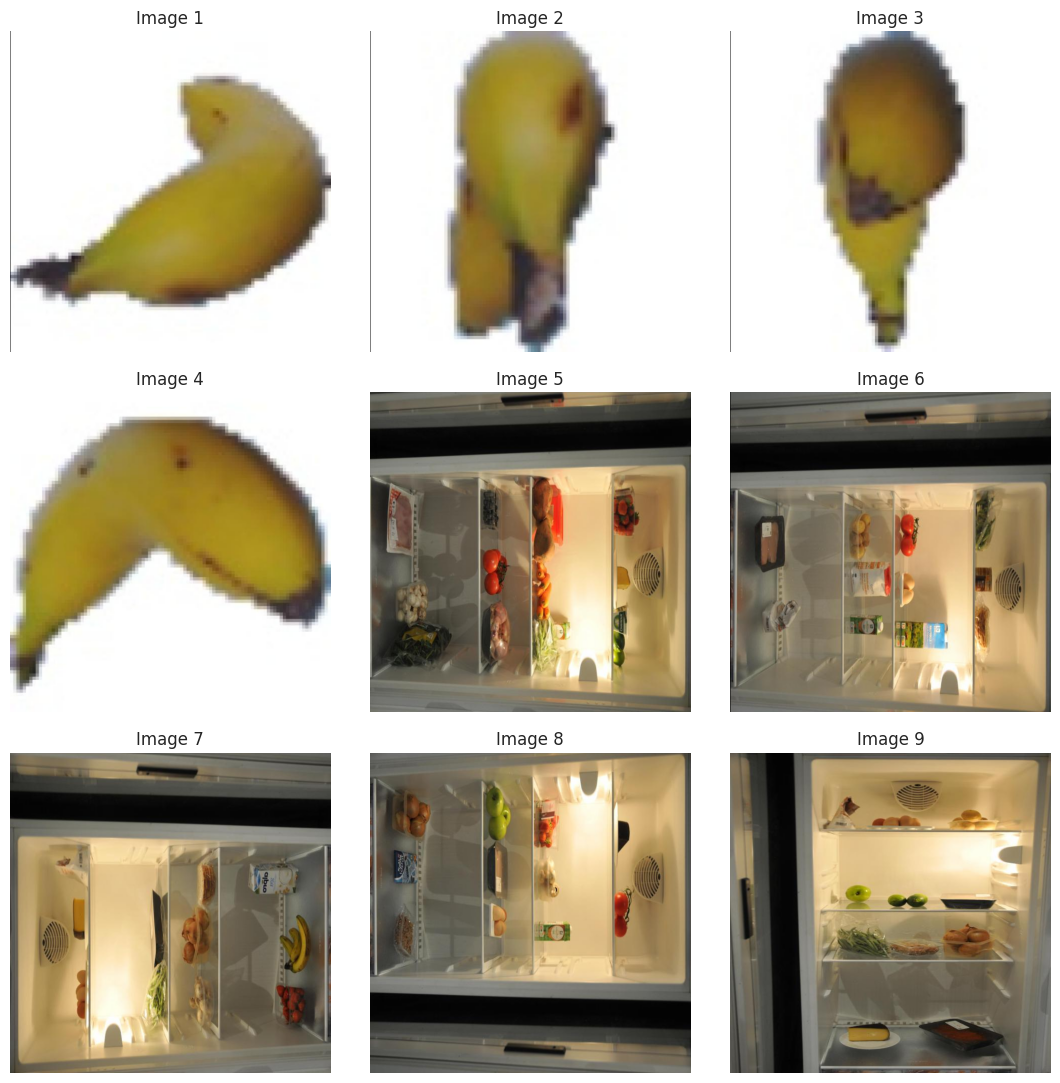

In [6]:
Image_dir = '/content/w251final.v2i/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
image = cv2.imread("/content/w251final.v2i/train/images/269_100_jpg.rf.0eee44aa659820b2039d705242cec276.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 150MB/s]



image 1/1 /content/w251final.v2i/train/images/269_100_jpg.rf.0eee44aa659820b2039d705242cec276.jpg: 416x416 (no detections), 219.4ms
Speed: 16.0ms preprocess, 219.4ms inference, 14.2ms postprocess per image at shape (1, 3, 416, 416)


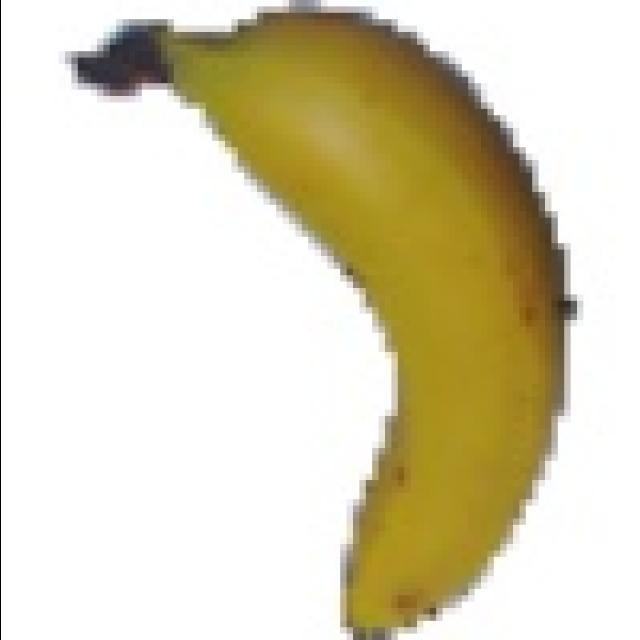

In [8]:
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/w251final.v2i/train/images/269_100_jpg.rf.0eee44aa659820b2039d705242cec276.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
Final_model = YOLO('yolov8n.pt')

Result_Final_model = Final_model.train(data="/content/w251final.v2i/data.yaml", epochs=10, imgsz=640, batch=64, lr0=0.0001, dropout=0.15, device='cpu')


Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/w251final.v2i/data.yaml, epochs=10, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=tor

100%|██████████| 755k/755k [00:00<00:00, 34.6MB/s]


Overriding model.yaml nc=80 with nc=31

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/w251final.v2i/train/labels... 1967 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1967/1967 [00:01<00:00, 1337.18it/s]

train: New cache created: /content/w251final.v2i/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/w251final.v2i/valid/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 1360.23it/s]

val: New cache created: /content/w251final.v2i/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.304      4.412      1.227        301        640: 100%|██████████| 31/31 [08:54<00:00, 17.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.03s/it]

                   all        204       1369      0.355     0.0216     0.0279     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.128      2.992      1.123        341        640: 100%|██████████| 31/31 [09:18<00:00, 18.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.32s/it]

                   all        204       1369     0.0554      0.836      0.259      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.065      1.897      1.115        348        640: 100%|██████████| 31/31 [09:06<00:00, 17.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all        204       1369      0.793      0.213      0.618      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.017      1.373      1.094        291        640: 100%|██████████| 31/31 [09:17<00:00, 18.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.58s/it]

                   all        204       1369      0.718      0.675       0.77       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9887      1.146      1.081        300        640: 100%|██████████| 31/31 [09:21<00:00, 18.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.95s/it]

                   all        204       1369      0.767      0.815      0.862      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.9692      1.025      1.069        300        640: 100%|██████████| 31/31 [09:16<00:00, 17.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.27s/it]

                   all        204       1369      0.838      0.862      0.899      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.9483     0.9504      1.055        292        640: 100%|██████████| 31/31 [09:12<00:00, 17.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.82s/it]

                   all        204       1369       0.86       0.87      0.912      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9293     0.8932      1.048        290        640: 100%|██████████| 31/31 [09:15<00:00, 17.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.81s/it]

                   all        204       1369      0.881      0.887      0.935      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9108      0.855      1.046        298        640: 100%|██████████| 31/31 [09:00<00:00, 17.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.10s/it]

                   all        204       1369      0.906      0.889      0.939       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9042     0.8348      1.032        367        640: 100%|██████████| 31/31 [09:07<00:00, 17.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.89s/it]

                   all        204       1369      0.931      0.899      0.949      0.671



10 epochs completed in 1.589 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3011693 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.85s/it]


                   all        204       1369      0.932      0.898      0.949      0.671
                 apple        204         36      0.898      0.889      0.931       0.69
                banana        204        144      0.991          1      0.995      0.945
                  beef        204         30          1      0.284      0.748      0.382
           blueberries        204         38       0.98      0.974      0.975      0.589
                 bread        204         30      0.965          1      0.994      0.742
                butter        204         38      0.976          1      0.995      0.796
              capsicum        204          4      0.732          1      0.945      0.618
                carrot        204         42      0.923      0.833       0.97      0.693
                cheese        204         55          1      0.899      0.982      0.732
               chicken        204         43      0.956      0.999      0.994      0.745
        chicken_breas

In [10]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

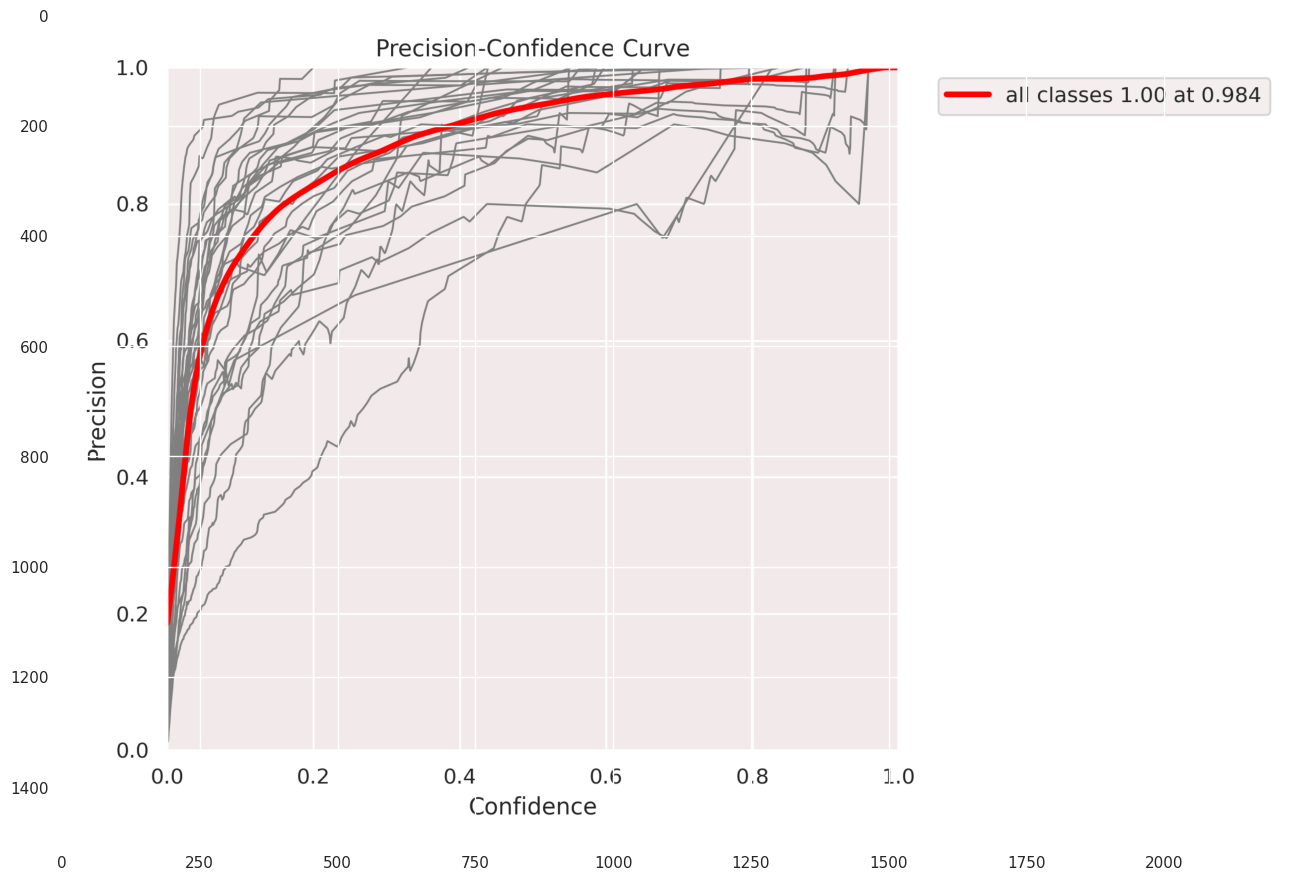

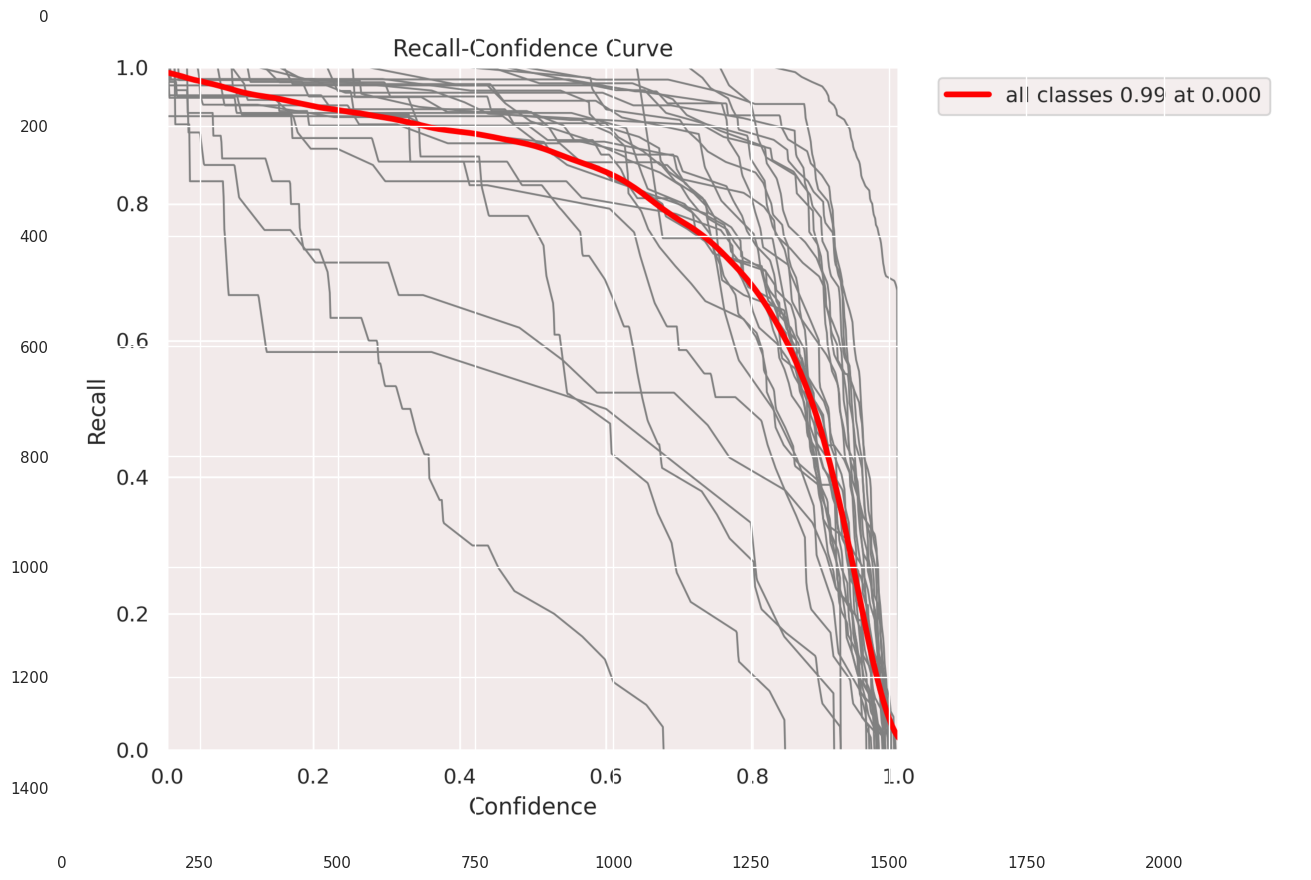

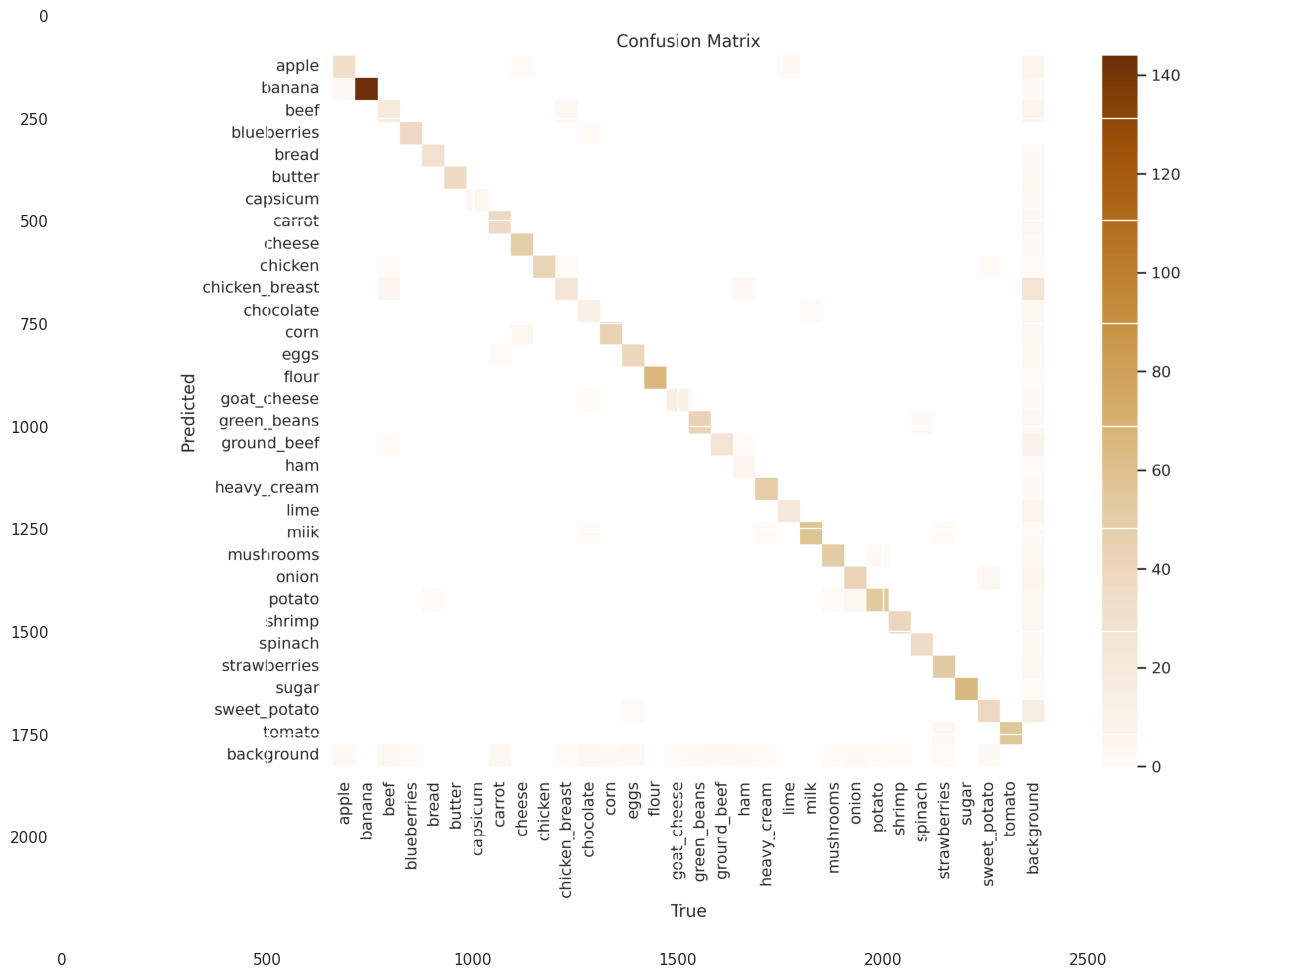

In [11]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [12]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.30410,4.41180,1.2270,0.35451,0.02157,0.02791,0.02622,1.00230,4.32460,0.95843,0.000086,0.000086,0.000086
1,2,1.12800,2.99160,1.1231,0.05537,0.83613,0.25865,0.17765,1.04340,3.46210,1.00520,0.000157,0.000157,0.000157
2,3,1.06470,1.89700,1.1148,0.79275,0.21323,0.61768,0.41882,1.02570,2.66020,1.04050,0.000211,0.000211,0.000211
3,4,1.01710,1.37310,1.0941,0.71792,0.67495,0.77027,0.52039,0.99999,1.74350,1.02130,0.000201,0.000201,0.000201
4,5,0.98870,1.14550,1.0808,0.76748,0.81477,0.86229,0.59234,0.98694,1.27220,1.01460,0.000201,0.000201,0.000201
5,6,0.96918,1.02500,1.0688,0.83849,0.86223,0.89863,0.62749,0.95550,1.06680,1.00220,0.000173,0.000173,0.000173
6,7,0.94832,0.95044,1.0548,0.85957,0.87022,0.91210,0.63468,0.95220,0.95634,0.99193,0.000144,0.000144,0.000144
7,8,0.92928,0.89316,1.0477,0.88083,0.88731,0.93482,0.65413,0.93968,0.96038,0.98700,0.000116,0.000116,0.000116
8,9,0.91080,0.85502,1.0462,0.90605,0.88860,0.93881,0.66023,0.92173,0.85751,0.98487,0.000088,0.000088,0.000088
9,10,0.90417,0.83483,1.0324,0.93123,0.89880,0.94865,0.67100,0.91232,0.82067,0.97762,0.000059,0.000059,0.000059


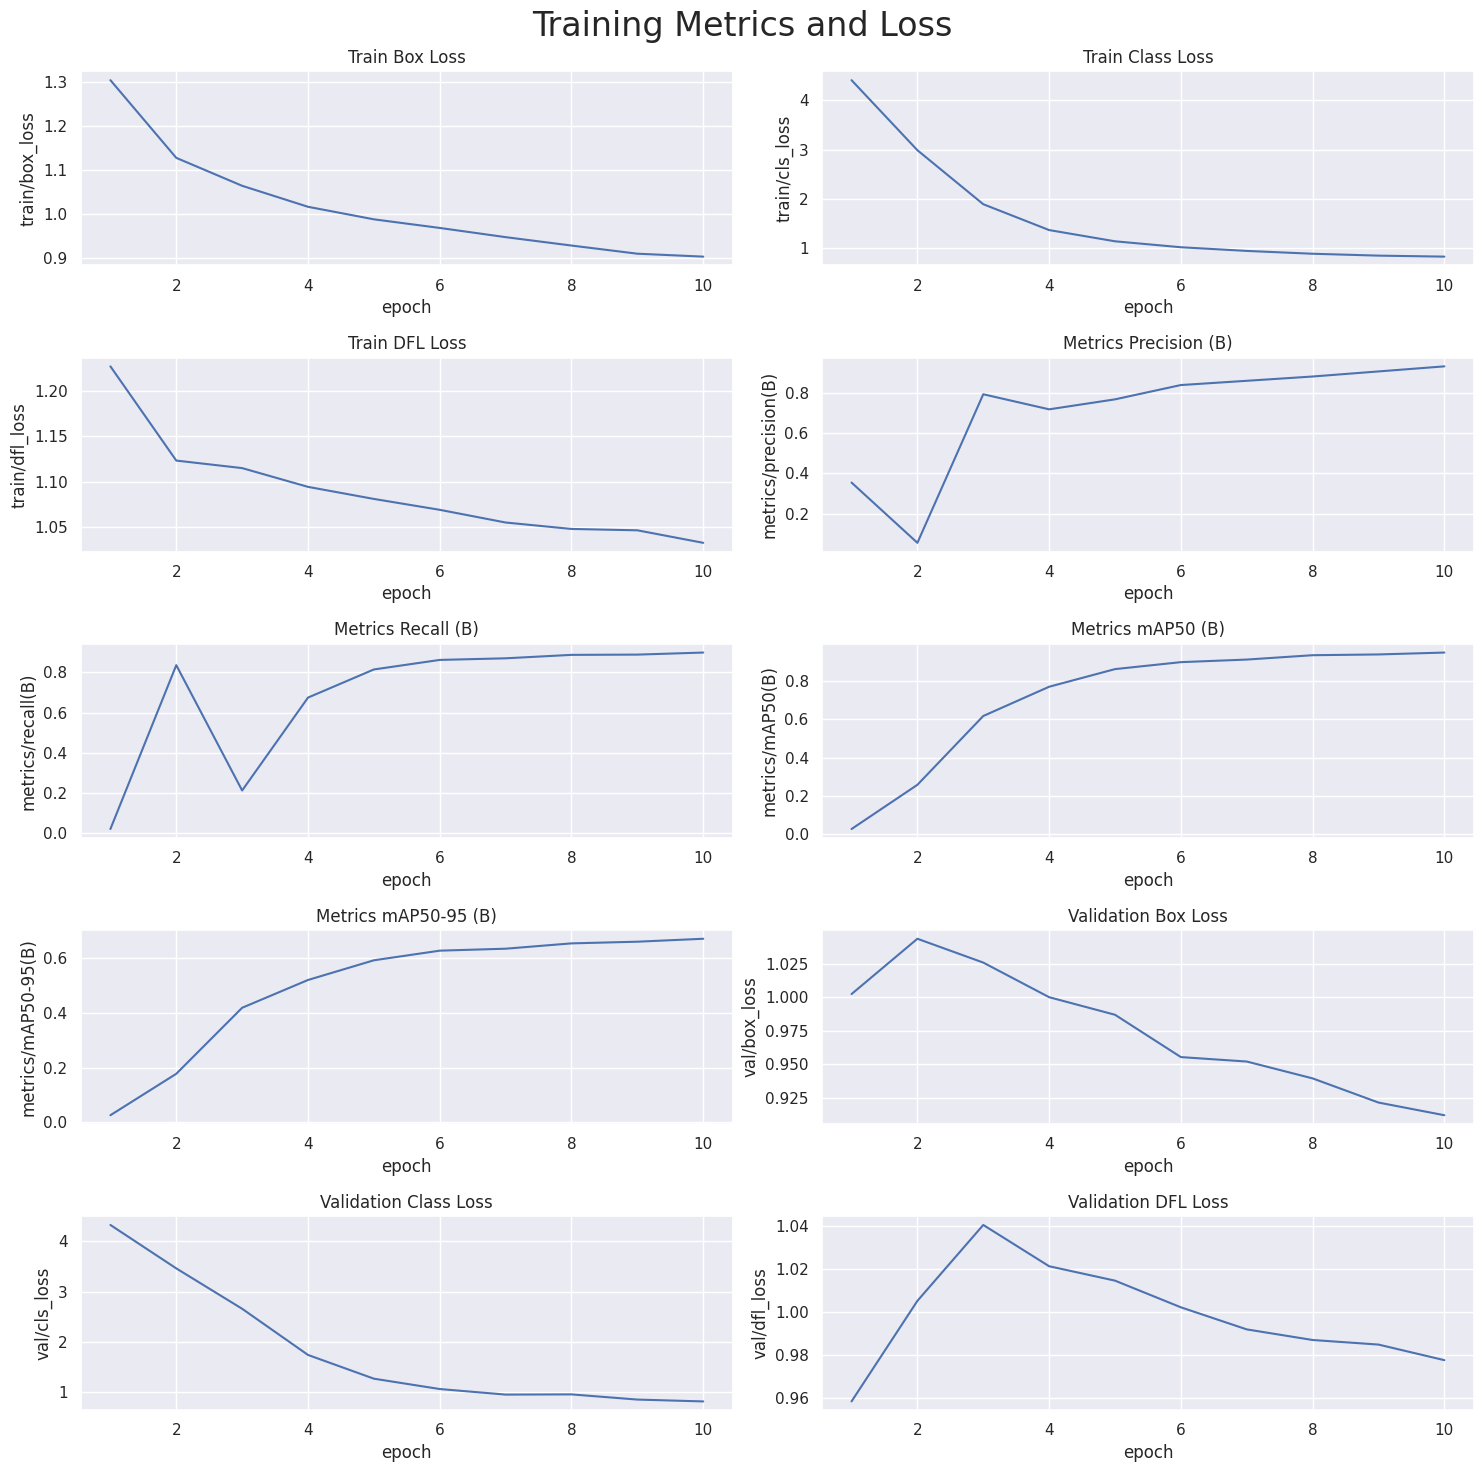

In [13]:
# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0, 0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0, 1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1, 0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1, 1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2, 0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2, 1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3, 0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3, 1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4, 0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4, 1])

# Set titles and axis labels for each subplot
axs[0, 0].set(title='Train Box Loss')
axs[0, 1].set(title='Train Class Loss')
axs[1, 0].set(title='Train DFL Loss')
axs[1, 1].set(title='Metrics Precision (B)')
axs[2, 0].set(title='Metrics Recall (B)')
axs[2, 1].set(title='Metrics mAP50 (B)')
axs[3, 0].set(title='Metrics mAP50-95 (B)')
axs[3, 1].set(title='Validation Box Loss')
axs[4, 0].set(title='Validation Class Loss')
axs[4, 1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [14]:
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3011693 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/w251final.v2i/test/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 1536.77it/s]

val: New cache created: /content/w251final.v2i/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.70s/it]


                   all        103        670      0.904       0.89      0.935      0.671
                 apple        103         25      0.821      0.916      0.931      0.671
                banana        103         70      0.983          1      0.995      0.945
                  beef        103         16      0.696      0.312      0.641      0.345
           blueberries        103         21          1      0.951      0.986      0.574
                 bread        103         19      0.949      0.989       0.99      0.722
                butter        103         17      0.945          1      0.995      0.817
              capsicum        103          6      0.652      0.943      0.845      0.608
                carrot        103         25      0.958      0.917      0.946      0.654
                cheese        103         26      0.991          1      0.995       0.74
               chicken        103         20      0.967          1      0.995      0.738
        chicken_breas

In [15]:
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9043102986965188
metrics/recall(B):  0.8898445703591451
metrics/mAP50(B):  0.9346182599453949
metrics/mAP50-95(B):  0.6706470772018344


In [18]:
image_dir = '/content/w251final.v2i/test/images'

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x416 1 banana, 59.5ms
Speed: 1.7ms preprocess, 59.5ms inference, 4.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 banana, 60.2ms
Speed: 2.3ms preprocess, 60.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 apple, 1 banana, 1 blueberries, 1 carrot, 1 corn, 1 green_beans, 2 limes, 1 mushrooms, 1 onion, 1 potato, 1 strawberries, 1 tomato, 61.3ms
Speed: 2.2ms preprocess, 61.3ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 blueberries, 1 carrot, 1 cheese, 1 chicken, 1 goat_cheese, 1 green_beans, 1 lime, 1 mushrooms, 1 spinach, 1 sweet_potato, 1 tomato, 67.3ms
Speed: 2.3ms preprocess, 67.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 banana, 62.3ms
Speed: 1.8ms preprocess, 62.3ms inference, 1.1ms postprocess per image at s

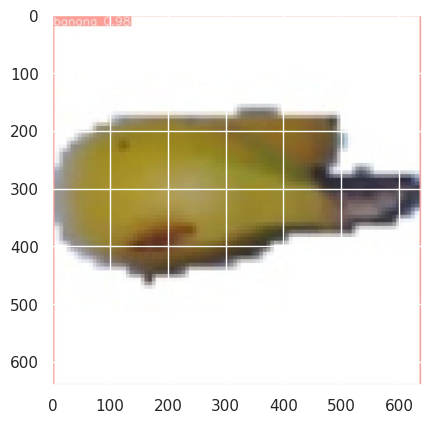

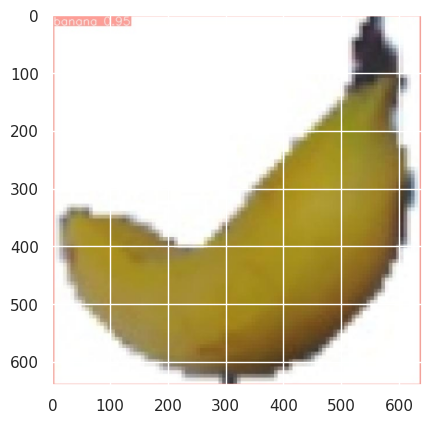

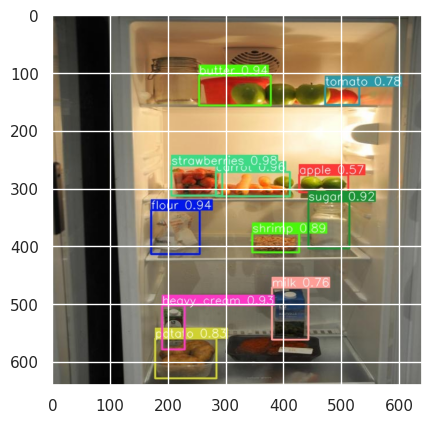

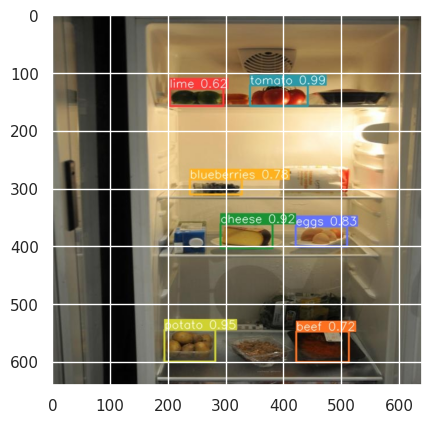

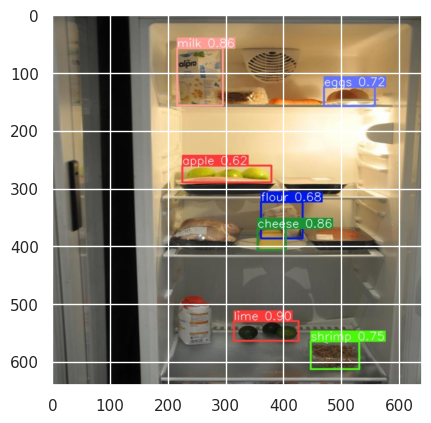

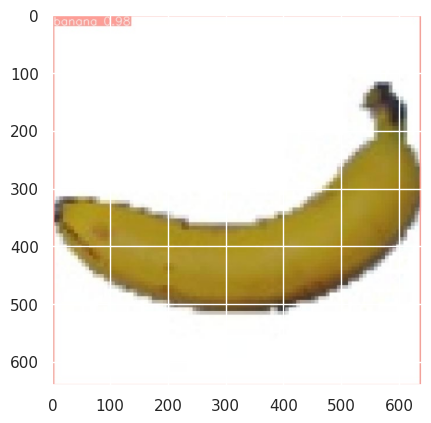

In [25]:
for i in range(6,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()